<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) Project 4 is all about exploring this data and modeling interesting relationships with regression.

Project 4 is also much more open-ended than the previous projects. You are more responsible for finding things about the data that interest you, coming up with your own hypothesis about it, and reporting on the analysis you carry out. That being said, there are still specific requirements and restrictions on the type of models you will be constructing.

---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

**There is a lot of different data. You are _NOT_ expected to explore all of it or include all of it in analyses.** The point of the project is to focus on aspects of San Francisco that are particularly interesting to you from a modeling point of view. 

**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


In [444]:
import pandas as pd, patsy
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import grid_search
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV,SGDClassifier
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Choose a dataset or datasets of interest to you and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

My hypothesis with this data is that number of evictions can impact the spending budget of San Francisco.

In [3]:
evictions = pd.read_csv('/home/llevin/Desktop/DSI-SF-2-llevin16/Projects/Project 4/san_francisco/evictions/sf_eviction_notices.csv')
budget = pd.read_csv('/home/llevin/Desktop/DSI-SF-2-llevin16/Projects/Project 4/san_francisco/city_budget/budget.csv')
spending_rev = pd.read_csv('/home/llevin/Desktop/DSI-SF-2-llevin16/Projects/Project 4/san_francisco/city_spending_revenue/spending_revenue.csv')

/home/llevin/anaconda2/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
evictions.head(3).T
budget.head(3).T
spending_rev.head(3).T

,0,1,2
Fiscal Year,1999,1999,1999
Revenue or Spending,Revenue,Revenue,Revenue
Related Gov’t Units,No,No,No
Organization Group Code,1,1,1
Organization Group,Public Protection,Public Protection,Public Protection
Department Code,ADP,ADP,ADP
Department,Adult Probation,Adult Probation,Adult Probation
Program Code,AKB,AKB,AKB
Program,Community Services,Community Services,Community Services
Character Code,250,250,400


In [5]:
evictions=evictions[~evictions['City'].isnull()]
evictions.info()
evictions['Neighborhoods - Analysis Boundaries'].value_counts()
evictions.rename(columns={'Neighborhoods - Analysis Boundaries':'Neighborhoods','Eviction Notice Source Zipcode':\
                         'Zipcode'},inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36017 entries, 0 to 36018
Data columns (total 29 columns):
Eviction ID                            36017 non-null object
Address                                36017 non-null object
City                                   36017 non-null object
State                                  36017 non-null object
Eviction Notice Source Zipcode         35227 non-null object
File Date                              36017 non-null object
Non Payment                            36017 non-null bool
Breach                                 36017 non-null bool
Nuisance                               36017 non-null bool
Illegal Use                            36017 non-null bool
Failure to Sign Renewal                36017 non-null bool
Access Denial                          36017 non-null bool
Unapproved Subtenant                   36017 non-null bool
Owner Move In                          36017 non-null bool
Demolition                             36017 non-null

In [6]:
for column in evictions.columns:
    if evictions[column].dtype == bool:
        evictions[column]=evictions[column].map(lambda x: 0 if x == False else 1)
evictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36017 entries, 0 to 36018
Data columns (total 29 columns):
Eviction ID                36017 non-null object
Address                    36017 non-null object
City                       36017 non-null object
State                      36017 non-null object
Zipcode                    35227 non-null object
File Date                  36017 non-null object
Non Payment                36017 non-null int64
Breach                     36017 non-null int64
Nuisance                   36017 non-null int64
Illegal Use                36017 non-null int64
Failure to Sign Renewal    36017 non-null int64
Access Denial              36017 non-null int64
Unapproved Subtenant       36017 non-null int64
Owner Move In              36017 non-null int64
Demolition                 36017 non-null int64
Capital Improvement        36017 non-null int64
Substantial Rehab          36017 non-null int64
Ellis Act WithDrawal       36017 non-null int64
Condo Conversion     

In [7]:
evictions['File Date'] = pd.to_datetime(evictions['File Date'])
evictions['Year'] = evictions['File Date'].map(lambda val: val.year)
evictions.head(3).T
evictions['Year'].value_counts()

1998    2917
1999    2627
2000    2571
1997    2555
2001    2183
2015    2080
2014    1981
2013    1870
2002    1660
2012    1631
2005    1539
2003    1521
2007    1482
2006    1473
2004    1441
2008    1413
2010    1359
2011    1296
2016    1244
2009    1174
Name: Year, dtype: int64

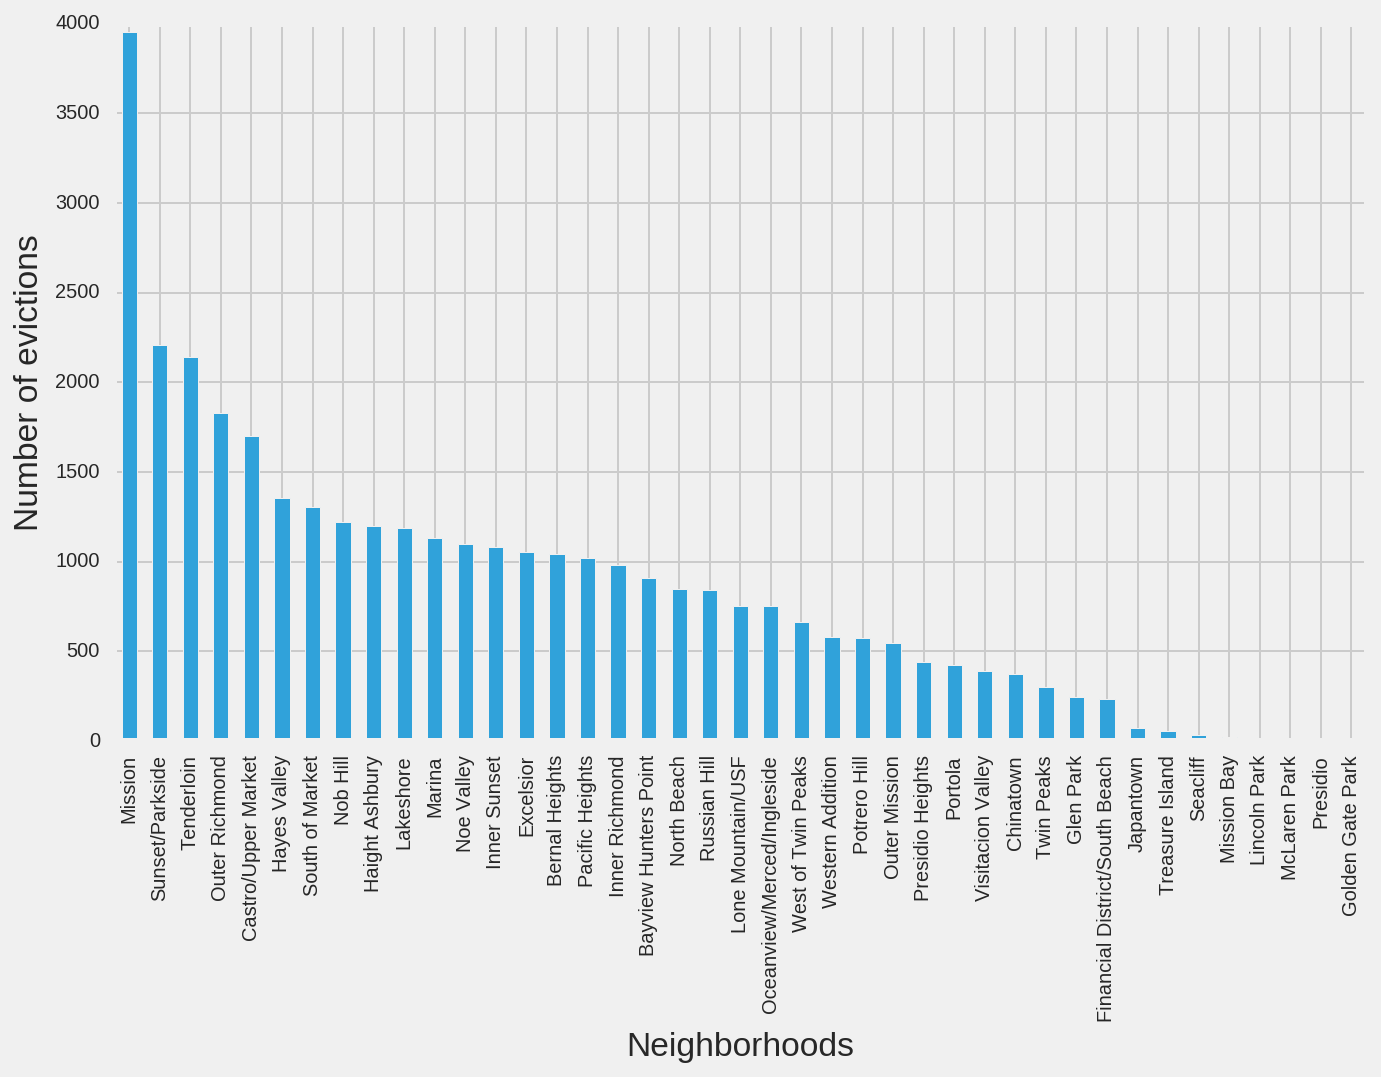

In [8]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
evictions['Neighborhoods'].value_counts().plot.bar(ax=ax)
ax.set_xlabel('Neighborhoods')
ax.set_ylabel('Number of evictions')
plt.show()

In [9]:
budget['Organization Group'].value_counts()

Public Works, Transportation & Commerce     35265
General Administration & Finance            31164
Community Health                            16315
Public Protection                           15657
Human Welfare & Neighborhood Development    14655
Culture & Recreation                        11333
General City Responsibilities                 923
Name: Organization Group, dtype: int64

In [10]:
spending_rev['Organization Group'].value_counts()

Public Works, Transportation & Commerce     196159
General Administration & Finance             98686
Community Health                             67866
Public Protection                            65539
Culture & Recreation                         56190
Human Welfare & Neighborhood Development     41821
General City Responsibilities                 5071
Name: Organization Group, dtype: int64

In [11]:
budget_sub = budget[budget['Organization Group']=='Human Welfare & Neighborhood Development']
spend_sub = spending_rev[spending_rev['Organization Group']=='Human Welfare & Neighborhood Development']

In [12]:
spend_sub.dropna(inplace=True)
budget_sub.dropna(inplace=True)

/home/llevin/anaconda2/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/llevin/anaconda2/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [13]:
budget_group = budget_sub[['Fiscal Year','Amount']].groupby('Fiscal Year').sum().reset_index()
spend_group = spend_sub[['Fiscal Year','Amount']].groupby('Fiscal Year').sum().reset_index()
eviction_group = evictions[['Eviction ID','Year']].groupby('Year').count().reset_index()

In [14]:
merged_years = eviction_group.merge(budget_group,left_on='Year',right_on='Fiscal Year',how='left')
merged_years = merged_years.merge(spend_group,left_on='Year',right_on='Fiscal Year',how='left')
merged_years = merged_years[['Year','Eviction ID','Amount_x','Amount_y']]
merged_years.rename(columns={'Eviction ID':'Evictions','Amount_x':'Annual Budget','Amount_y':'Annual Spending Revenue'}
                    ,inplace=True)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


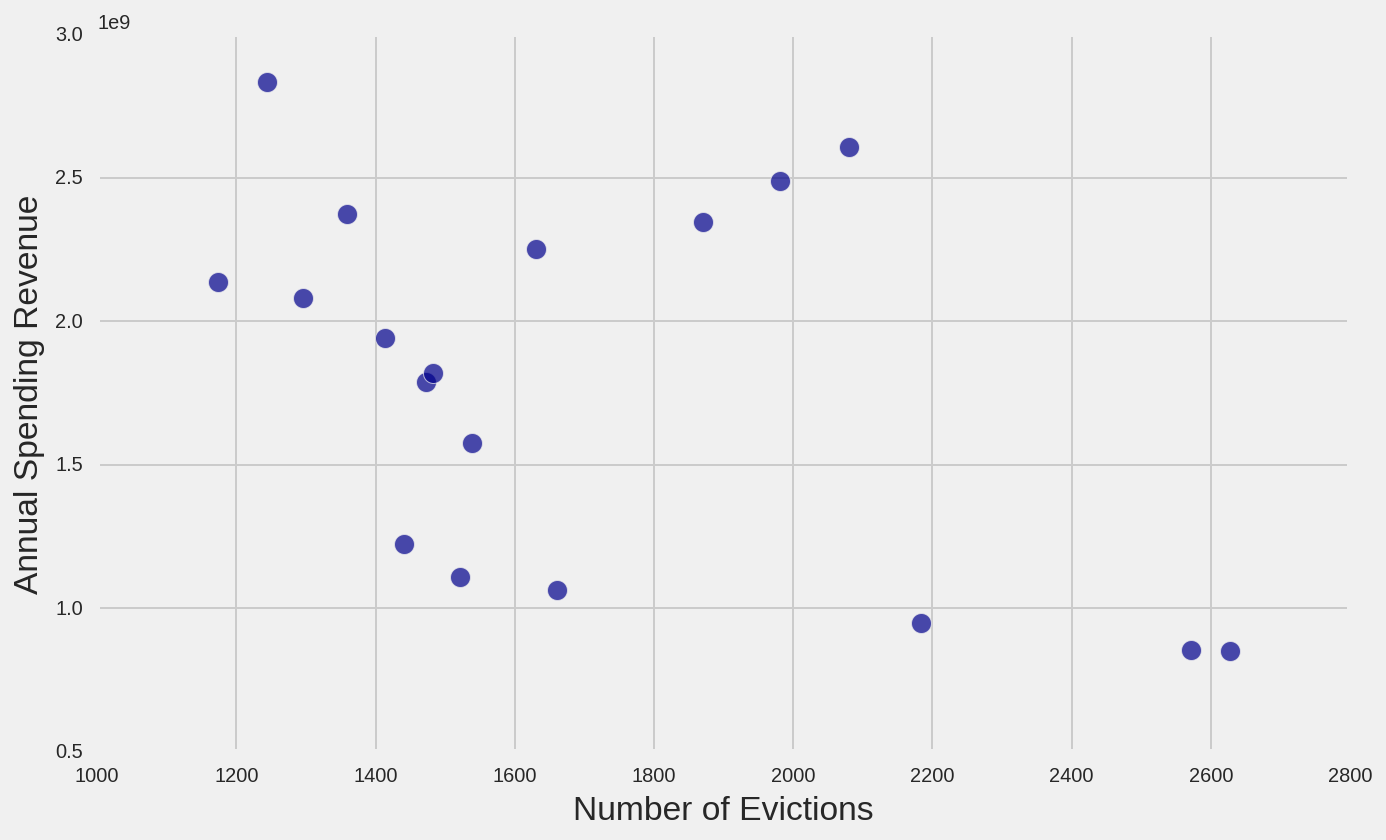

In [15]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax = plt.scatter(data=merged_years,x='Evictions',y='Annual Spending Revenue',s=100,alpha=.7,c='Darkblue')
plt.ylabel('Annual Spending Revenue')
plt.xlabel('Number of Evictions')
plt.show()

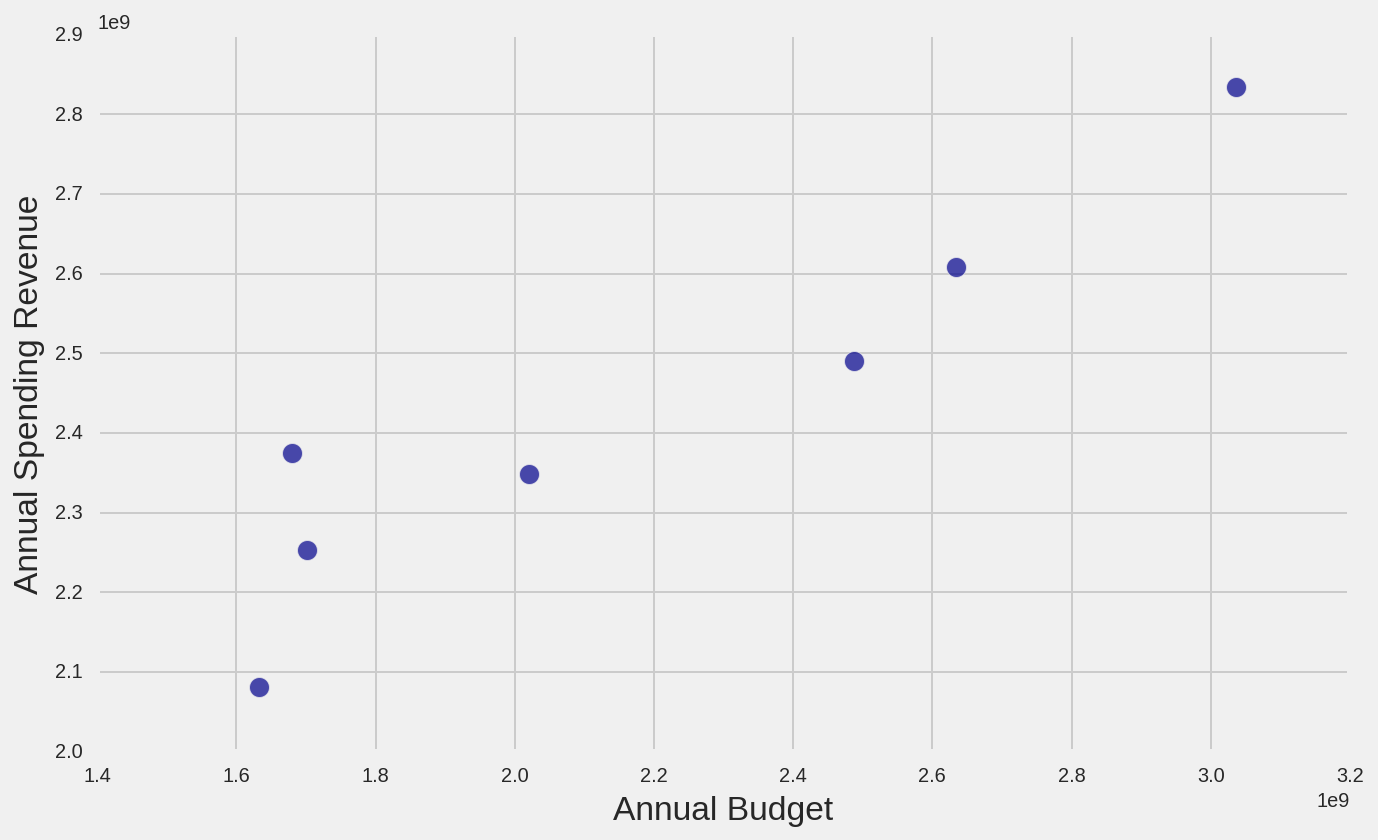

In [16]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax = plt.scatter(data=merged_years,x='Annual Budget',y='Annual Spending Revenue',s=100,alpha=.7,c='Darkblue')
plt.ylabel('Annual Spending Revenue')
plt.xlabel('Annual Budget')
plt.show()

In [17]:
x = merged_years.ix[2:,['Annual Spending Revenue']]
y = merged_years.ix[2:,'Evictions'].values

In [36]:
lr = LinearRegression()

model = lr.fit(x,y)
score = model.score(x,y)
y_hat = model.predict(x)

print 'R^2: ',score

R^2:  0.215016915115


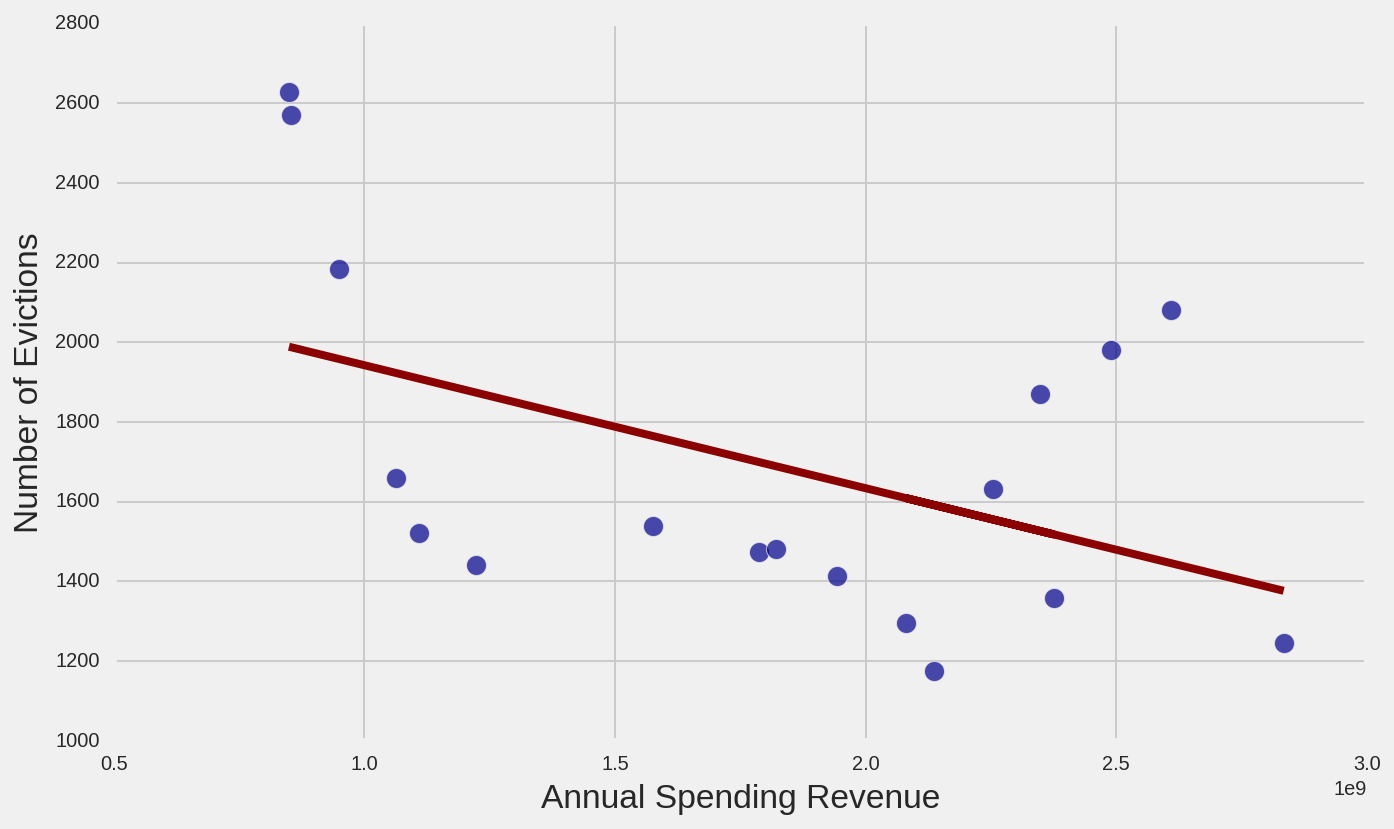

In [41]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax = plt.scatter(x,y,s=100,alpha=.7,c='Darkblue')
ax = plt.plot(x,y_hat,color='Darkred')
plt.xlabel('Annual Spending Revenue')
plt.ylabel('Number of Evictions')
plt.show()

There seems to be some impact from number of evictions on spending budget. However, given that to merge this data it had to be grouped by year it lead to a very small sample and so this model could definitely be limited in scale.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

1) While most people believe that R^2 is just a metric that shows how much of the variance in your data can be explained in your model, it actually shows how much of the variance, over the baseline predictor (which is the mean of your target), is explained by the model. This can create negative R^2 values when the baseline is better than the model. I.e. the model fits the data so poorly it's better to use nothing but the target variable as a predictor.

2) R^2 can only be negative on new data because the entire process of regression is designed to create the optimal model on a dataset, which R^2 is a metric of. This process can not give a negative R^2 on the data the model was fit on because even if the model can't predict the target better than using the mean (baseline), it will just output a model equal to the baseline, giving you an R^2 of 0. I.e. The worst possible model is just the baseline which has an R^2 of 0.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine multiple sources of data and evaluate a model with regularized regression

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**

1. Use _NEW_ sources of data for this section. It should not be related to your analysis/hypothesis from section 1.
- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. Find the optimal hyperparameters (alpha, l1_ratio) using gridsearch.
- Report on which model is best, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


In [20]:
incidents = pd.read_csv('/home/llevin/Desktop/DSI-SF-2-llevin16/Projects/Project 4/san_francisco/fire_data/fire_incidents.csv')
inspections = pd.read_csv('/home/llevin/Desktop/DSI-SF-2-llevin16/Projects/Project 4/san_francisco/fire_data/fire_inspections.csv')
violations = pd.read_csv('/home/llevin/Desktop/DSI-SF-2-llevin16/Projects/Project 4/san_francisco/fire_data/sf_firecode_violations.csv')

/home/llevin/anaconda2/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (11,12,19,44,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/llevin/anaconda2/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (14,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
incidents.head(3).T
#inspections.head(3).T
#violations.head(3).T

,0,1,2
Incident Number,9030109,13067402,12044490
Exposure Number,0,0,0
Address,310 Colon Av.,20 Lansdale Av,7th St. / Folsom St.
Incident Date,04/12/2009,07/18/2013,05/13/2012
Call Number,91020273,131990117,121340051
Alarm DtTm,04/12/2009 06:09:13 PM,07/18/2013 10:32:03 AM,05/13/2012 03:55:37 AM
Arrival DtTm,04/12/2009 06:13:45 PM,07/18/2013 10:37:15 AM,05/13/2012 04:01:57 AM
Close DtTm,04/12/2009 07:23:13 PM,07/18/2013 10:39:55 AM,05/13/2012 04:05:44 AM
City,SF,SF,SF
Zipcode,NaN,NaN,94103


In [22]:
incidents.isnull().sum()
incidents=incidents[~incidents['Zipcode'].isnull()]
inspections=inspections[~inspections['Inspection Address Zipcode'].isnull()]
violations=violations[~violations['Zipcode'].isnull()]

In [44]:
violations.info()
#incidents.info()
#inspections.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8842 entries, 0 to 8875
Data columns (total 18 columns):
Violation Id                  8842 non-null object
Violation Number              8842 non-null int64
Violation Date                8842 non-null object
Violation Item                8829 non-null object
Violation Item Description    8759 non-null object
Citation Number               23 non-null object
Corrective Action             3994 non-null object
Inspection Number             8755 non-null float64
Address                       8842 non-null object
Zipcode                       8842 non-null float64
Battalion                     8837 non-null object
Station Area                  8781 non-null object
Fire Prevention District      8842 non-null object
Status                        8842 non-null object
Close Date                    8842 non-null object
Supervisor District           8842 non-null float64
Neighborhood  District        8842 non-null object
Location                  

In [68]:
incidents['Count']=1
columns = []
for col in incidents.columns:
    if (incidents[col].dtype != object) or col in ['Neighborhood  District','Zipcode']:
        columns.append(col)
        
incidents = incidents.ix[:,columns]
inc_group = incidents.groupby(['Neighborhood  District','Zipcode']).sum().reset_index()
inc_group.rename(columns={'Neighborhood  District':'Neighborhoods'},inplace=True)

inc_group.head()
inc_group.isnull().sum()

Neighborhoods                                 0
Zipcode                                       0
Incident Number                               0
Exposure Number                               0
Call Number                                   0
Suppression Units                             0
Suppression Personnel                         0
EMS Units                                     0
EMS Personnel                                 0
Other Units                                   0
Other Personnel                               0
Estimated Property Loss                       8
Estimated Contents Loss                       8
Fire Fatalities                               0
Fire Injuries                                 0
Civilian Fatalities                           0
Civilian Injuries                             0
Number of Alarms                            125
Floor of Fire Origin                         25
Number of floors with minimum damage         26
Number of floors with significant damage

In [83]:
vio_group = violations[['Violation Id','Zipcode','Neighborhood  District']]\
                        .groupby(['Zipcode','Neighborhood  District']).count().reset_index()
vio_group.rename(columns={'Neighborhood  District':'Neighborhoods','Violation Id':'Violations'},inplace=True)
vio_group.head()
vio_group.isnull().sum()

Zipcode          0
Neighborhoods    0
Violations       0
dtype: int64

In [84]:
inspections['Count']=1
ins_group = inspections[['Count','Inspection Address Zipcode','Fee','Neighborhood  District']]\
                        .groupby(['Inspection Address Zipcode','Neighborhood  District']).sum().reset_index()
ins_group.rename(columns={'Inspection Address Zipcode':'Zipcode','Neighborhood  District':'Neighborhoods'},inplace=True)
ins_group.loc[ins_group['Fee'].isnull(),'Fee']=0.
ins_group.isnull().sum()

Zipcode          0
Neighborhoods    0
Count            0
Fee              0
dtype: int64

In [159]:
fire = inc_group.merge(vio_group,left_on=['Zipcode','Neighborhoods'],right_on=['Zipcode','Neighborhoods'],how='outer')
fire = fire.merge(ins_group,left_on=['Zipcode','Neighborhoods'],right_on=['Zipcode','Neighborhoods'],how='outer')
fire.rename(columns={'Count_x':'Incidents','Count_y':'Inspections'},inplace=True)
fire=fire[~fire['Incident Number'].isnull()]
fire.isnull().sum()
fire = fire.ix[:,fire.columns != ['Number of Alarms']]
fire.loc[fire['Fee'].isnull(),'Fee']=0.
fire.loc[fire['Inspections'].isnull(),'Inspections']=0.
fire.loc[fire['Violations'].isnull(),'Violations']=0.
fire.loc[fire['Estimated Property Loss'].isnull(),'Estimated Property Loss']=0.
fire.loc[fire['Estimated Contents Loss'].isnull(),'Estimated Contents Loss']=0.
fire.dropna(inplace=True)
fire = fire.ix[:,fire.columns != ['Incident Number']]
fire = fire.ix[:,fire.columns != ['Call Number']]
fire.head(3).T

,0,2,3
Neighborhoods,Bayview Hunters Point,Bayview Hunters Point,Bayview Hunters Point
Zipcode,94107,94124,94134
Exposure Number,0,0,0
Suppression Units,1040,31204,1186
Suppression Personnel,3601,108306,4229
EMS Units,146,2307,95
EMS Personnel,137,4217,180
Other Units,12,498,12
Other Personnel,29,913,26
Estimated Property Loss,391001,1.78371e+07,333708


In [168]:
lr = LinearRegression()
col = [col for col in fire.columns if col not in ['Civilian Fatalities','Neighborhoods','Zipcode']]


y = fire['Civilian Fatalities'].values
x = fire[col]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

model        =  lr.fit(scaled_data, y)
predictions  =  model.predict(scaled_data)
score        =  model.score(scaled_data, y)

scores = cross_val_score(lr, scaled_data, y, cv=10)
print "Cross-validated scores:", scores

R_squared = metrics.r2_score(y, predictions)
print "Cross-Predicted R^2:", R_squared

Cross-validated scores: [ -0.52940972   0.           0.           0.           0.25395288
  -3.34025778   0.37859369 -12.60611746  -3.93733156  -1.07252181]
Cross-Predicted R^2: 0.763994669499


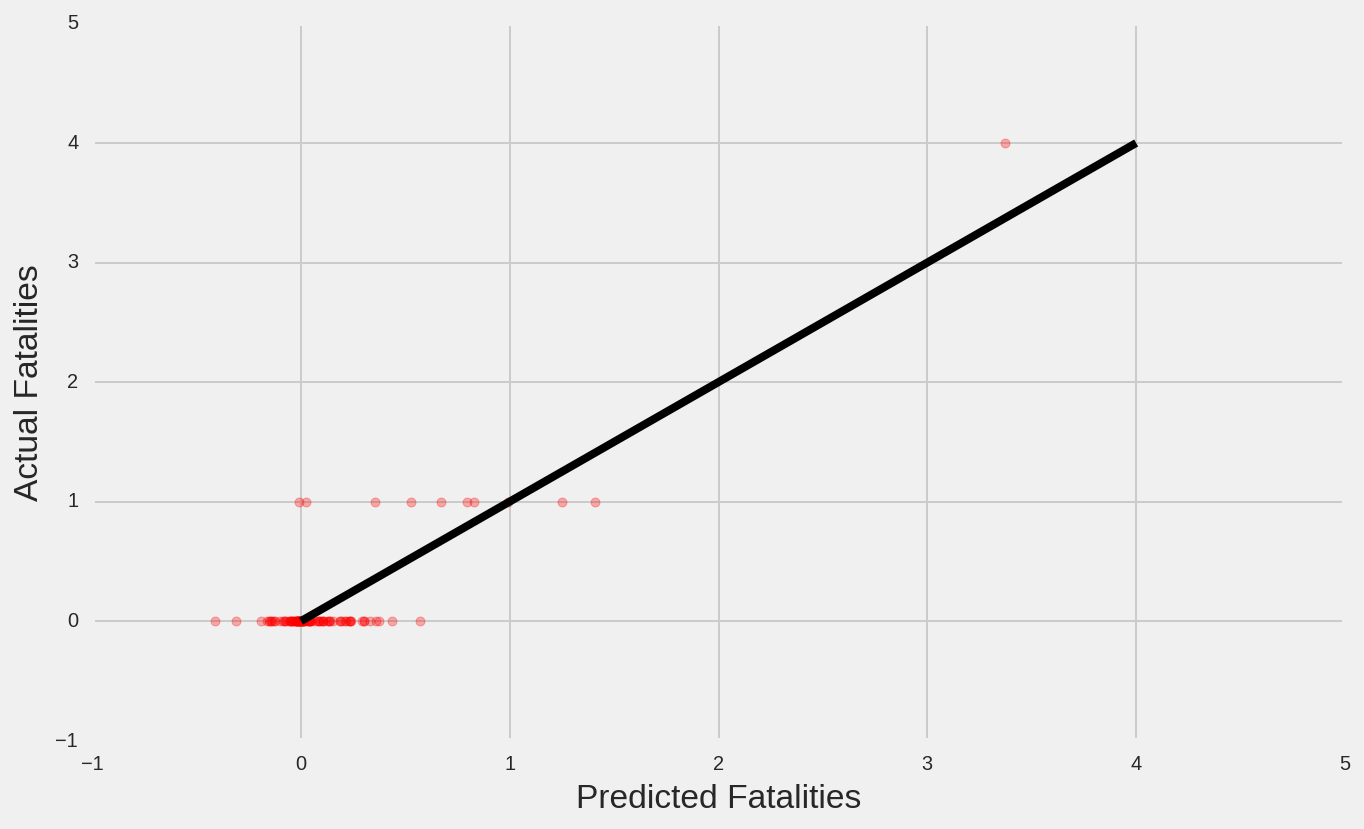

In [158]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax.scatter(predictions,y,color='r',alpha=.3)
ax.plot([np.min(y),np.max(y)],[np.min(y),np.max(y)],color='black')
ax.set_xlabel('Predicted Fatalities')
ax.set_ylabel('Actual Fatalities')
plt.show()
#This shows that the number of fatalities is too small in range that it is essentially discrete in this data. I'll do 
#the Ridge and Lasso on a different target which should be more continuous to hopefully show some differences 
# in the Ridge and Lasso. This just shows that I need a lot more work on speeding up my EDA and initial data cleaning.

In [333]:
col = [col for col in fire.columns if col not in ['Incidents','Neighborhoods','Zipcode']]


y = fire['Incidents'].values
x = fire[col]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

In [334]:
ridge = RidgeCV(cv=4)
ridge.fit(scaled_data,y)
ridge.alpha_

opt_ridge = Ridge(alpha=ridge.alpha_)

ridge_scores = cross_val_score(opt_ridge, scaled_data, y, cv=4)
print "Cross-validated scores:", ridge_scores
print "Mean: ", np.mean(ridge_scores)

Cross-validated scores: [ 0.988797    0.9949967   0.96995895  0.98356541]
Mean:  0.984329515997


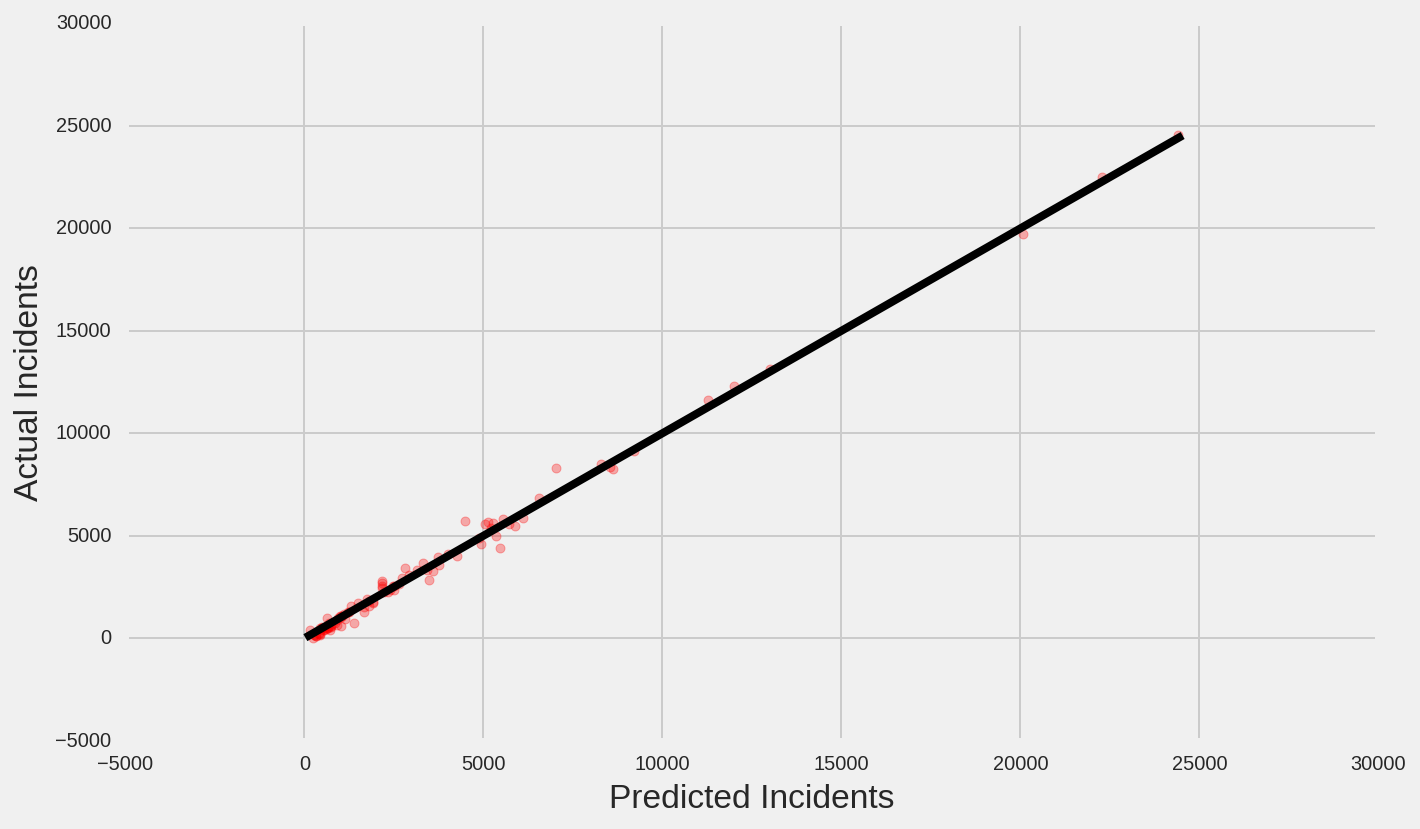

In [335]:
predictions = ridge.predict(scaled_data)

fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax.scatter(predictions,y,color='r',alpha=.3)
ax.plot([np.min(y),np.max(y)],[np.min(y),np.max(y)],color='black')
ax.set_xlabel('Predicted Incidents')
ax.set_ylabel('Actual Incidents')
plt.show()

In [336]:
lasso = LassoCV(n_alphas=200,cv=4)
lasso.fit(scaled_data,y)

opt_lasso = Lasso(alpha=lasso.alpha_)

predictions = lasso.predict(scaled_data)

lasso_scores = cross_val_score(opt_lasso, scaled_data, y, cv=4)
print "Cross-validated scores:", lasso_scores
print "Mean: ", np.mean(lasso_scores)

Cross-validated scores: [ 0.9947176   0.99579173  0.98381228  0.99462259]
Mean:  0.99223605006


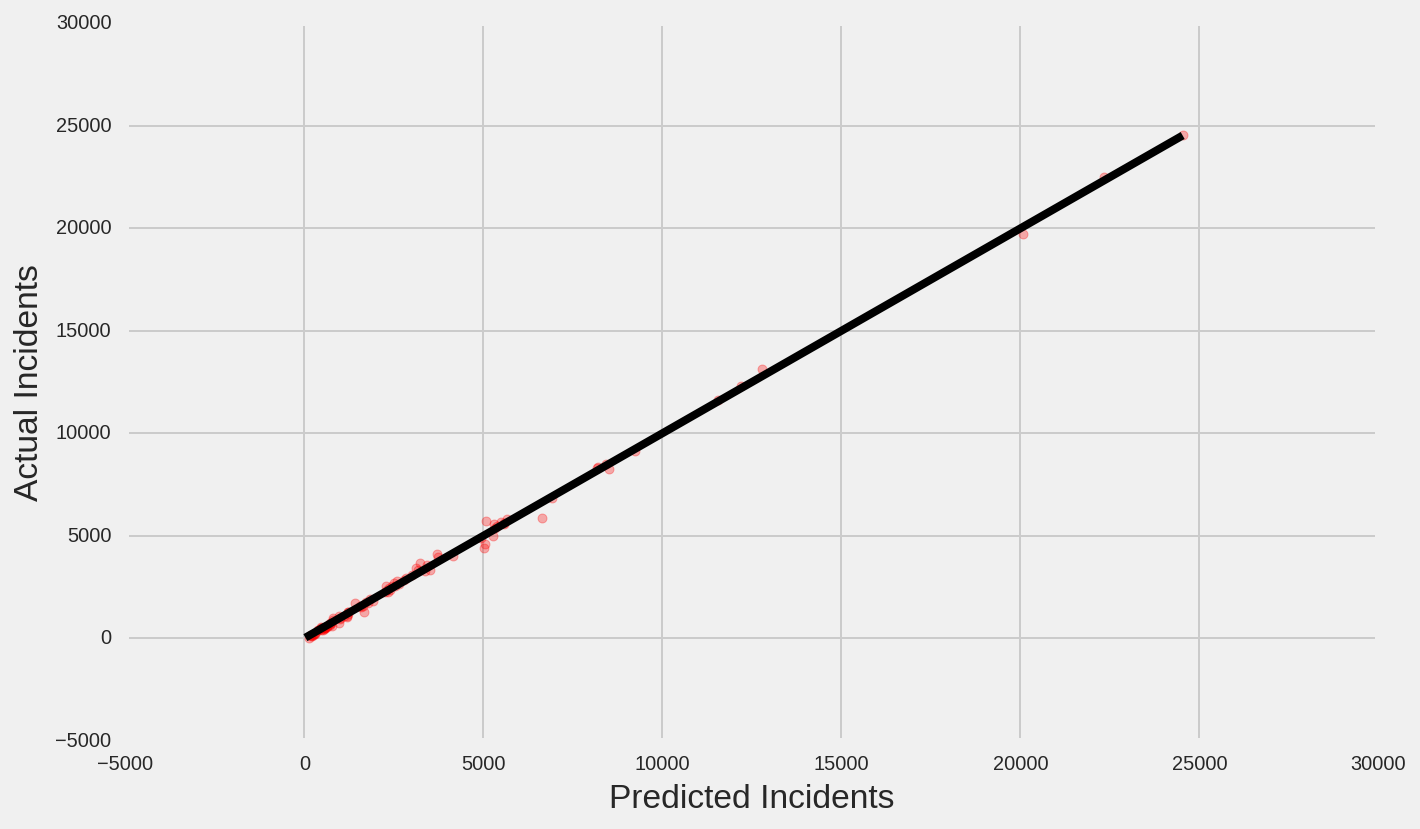

In [337]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax.scatter(predictions,y,color='r',alpha=.3)
ax.plot([np.min(y),np.max(y)],[np.min(y),np.max(y)],color='black')
ax.set_xlabel('Predicted Incidents')
ax.set_ylabel('Actual Incidents')
plt.show()

In [338]:
elastic = ElasticNetCV(l1_ratio=np.arange(.01,1,.05),n_alphas=50,cv=4)
elastic.fit(scaled_data,y)
opt_elastic = ElasticNet(alpha=elastic.alpha_,l1_ratio=elastic.l1_ratio_)
predictions = elastic.predict(scaled_data)
elastic_scores = cross_val_score(opt_elastic, scaled_data, y, cv=4)
print "Cross-validated scores:", elastic_scores
print "Mean: ", np.mean(elastic_scores)

Cross-validated scores: [ 0.98980331  0.99428163  0.97217595  0.97918667]
Mean:  0.983861889828


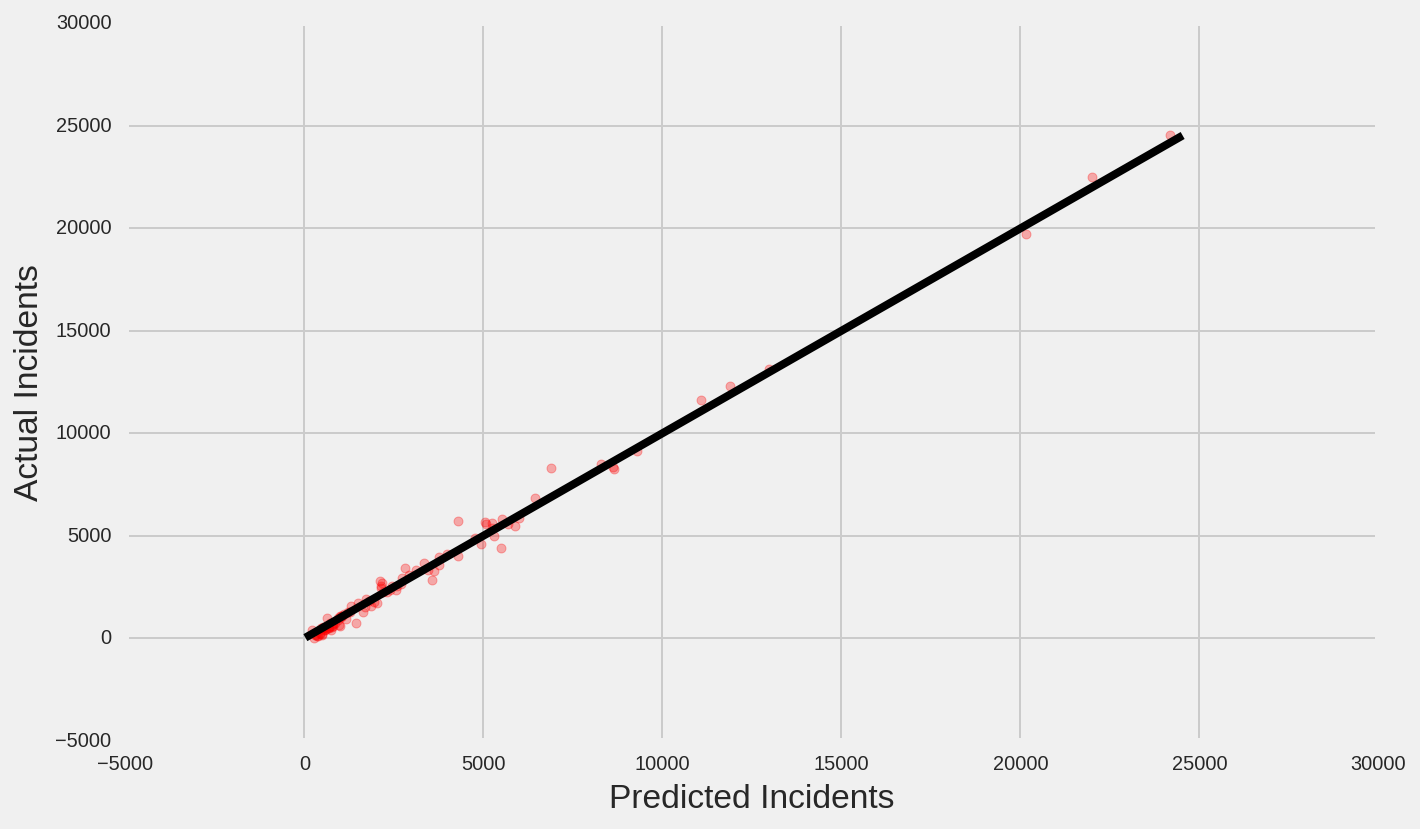

In [339]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax.scatter(predictions,y,color='r',alpha=.3)
ax.plot([np.min(y),np.max(y)],[np.min(y),np.max(y)],color='black')
ax.set_xlabel('Predicted Incidents')
ax.set_ylabel('Actual Incidents')
plt.show()

At first it seems like these models are fantastic. A cross-validated score of above 90%, however, is nearly impossible in real data so there is some kind of issue here.

In [353]:
importance = pd.DataFrame({'Coef':lasso.coef_,'Abs_Coef':np.abs(lasso.coef_),'Variable':x.columns})
importance.sort_values('Abs_Coef',ascending=False,inplace=True)
importance
#Immediately we see something odd as there are some ridiculously high coefficiants.

,Abs_Coef,Coef,Variable
2,2960.360303,2960.360303,Suppression Personnel
19,405.801848,405.801848,Supervisor District
1,388.004997,388.004997,Suppression Units
4,215.803773,215.803773,EMS Personnel
21,211.506486,211.506486,Inspections
5,173.877630,173.877630,Other Units
3,103.409872,103.409872,EMS Units
11,45.164675,-45.164675,Civilian Fatalities
18,30.942506,30.942506,Number of Sprinkler Heads Operating
22,15.675922,-15.675922,Fee


In [379]:
print np.corrcoef(y,x['Suppression Personnel'].values)
print np.corrcoef(y,x['Supervisor District'].values)
print np.corrcoef(y,x['Suppression Personnel'].values) 
x.corr()

[[ 1.          0.99720357]
 [ 0.99720357  1.        ]]
[[ 1.          0.92246214]
 [ 0.92246214  1.        ]]
[[ 1.          0.99720357]
 [ 0.99720357  1.        ]]


,Exposure Number,Suppression Units,Suppression Personnel,EMS Units,EMS Personnel,Other Units,Other Personnel,Estimated Property Loss,Estimated Contents Loss,Fire Fatalities,...,Floor of Fire Origin,Number of floors with minimum damage,Number of floors with significant damage,Number of floors with heavy damage,Number of floors with extreme damage,Number of Sprinkler Heads Operating,Supervisor District,Violations,Inspections,Fee
Exposure Number,1.000000,0.058265,0.063064,0.093562,0.090679,0.046231,0.057463,0.161008,0.160162,NaN,...,0.039019,0.067870,0.065283,0.083336,0.117816,0.087161,0.041996,0.068806,0.036601,-0.040920
Suppression Units,0.058265,1.000000,0.998374,0.950917,0.950396,0.860022,0.928560,0.379272,0.260193,NaN,...,0.952431,0.957511,0.853794,0.738213,0.653736,0.816895,0.906194,0.892026,0.884377,0.528233
Suppression Personnel,0.063064,0.998374,1.000000,0.947524,0.947978,0.858673,0.925281,0.386679,0.270778,NaN,...,0.954802,0.960121,0.850015,0.728650,0.651488,0.827291,0.906071,0.896622,0.880027,0.525604
EMS Units,0.093562,0.950917,0.947524,1.000000,0.997006,0.834139,0.914834,0.383903,0.263547,NaN,...,0.859704,0.892524,0.844282,0.792358,0.726218,0.722624,0.940764,0.843389,0.827567,0.452355
EMS Personnel,0.090679,0.950396,0.947978,0.997006,1.000000,0.833827,0.914511,0.372397,0.251487,NaN,...,0.857075,0.885235,0.836793,0.781689,0.723142,0.705279,0.939723,0.850296,0.842205,0.480172
Other Units,0.046231,0.860022,0.858673,0.834139,0.833827,1.000000,0.965099,0.280994,0.179661,NaN,...,0.781333,0.796012,0.701725,0.588362,0.611440,0.620724,0.800408,0.711022,0.746762,0.371263
Other Personnel,0.057463,0.928560,0.925281,0.914834,0.914511,0.965099,1.000000,0.330651,0.215052,NaN,...,0.842512,0.876169,0.799864,0.730683,0.716357,0.654526,0.874385,0.824935,0.823863,0.404960
Estimated Property Loss,0.161008,0.379272,0.386679,0.383903,0.372397,0.280994,0.330651,1.000000,0.920250,NaN,...,0.380698,0.466621,0.344604,0.334756,0.345313,0.535516,0.385611,0.444308,0.301499,0.067003
Estimated Contents Loss,0.160162,0.260193,0.270778,0.263547,0.251487,0.179661,0.215052,0.920250,1.000000,NaN,...,0.280459,0.357316,0.219625,0.203133,0.141873,0.484514,0.267163,0.353107,0.201472,0.050218
Fire Fatalities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So this tells me there is enormous multicollinearity between some of the variables (Suppression Units, EMS, etc.) and the target variable. This would inevitably lead to a great regression model when many of the variables are so closely linked to the target.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another, different analysis and report on it

---

1. Combining multiple sources of data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.

This section is just another analysis like the first sections, but is more open-ended in what models you decide to build and why. Don't feel obligated to try every out every regularized regression model (though it doesn't hurt). 


My hypothesis is that the size of a park helps predict the quality score of a park.

In [233]:
park_info = pd.read_csv('/home/llevin/Desktop/DSI-SF-2-llevin16/Projects/Project 4/san_francisco/parks/park_info.csv')
park_scores = pd.read_csv('/home/llevin/Desktop/DSI-SF-2-llevin16/Projects/Project 4/san_francisco/parks/park_scores.csv')

#### Data Cleaning and EDA

In [217]:
park_info.head(3).T
park_scores.head(3).T

,0,1,2
ParkID,86,13,9
PSA,PSA4,PSA4,PSA4
Park,Carl Larsen Park,Junipero Serra Playground,Rolph Nicol Playground
FQ,FY05Q3,FY05Q3,FY05Q3
Score,0.795,0.957,0.864


In [244]:
park_info = park_info.ix[1:,['Acreage','ParkID']]
park_scores = park_scores.ix[:,['ParkID','Score','FQ']]
parks = park_scores.merge(park_info,left_on='ParkID',right_on='ParkID',how='left')
parks.dropna(inplace=True)
def date_format(element):
    element = element.replace('FY','20')
    element = float(element.replace('Q','0'))
    return element

parks['FQ'] = parks['FQ'].map(date_format)
parks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5482 entries, 0 to 5494
Data columns (total 4 columns):
ParkID     5482 non-null int64
Score      5482 non-null float64
FQ         5482 non-null float64
Acreage    5482 non-null float64
dtypes: float64(3), int64(1)
memory usage: 214.1 KB


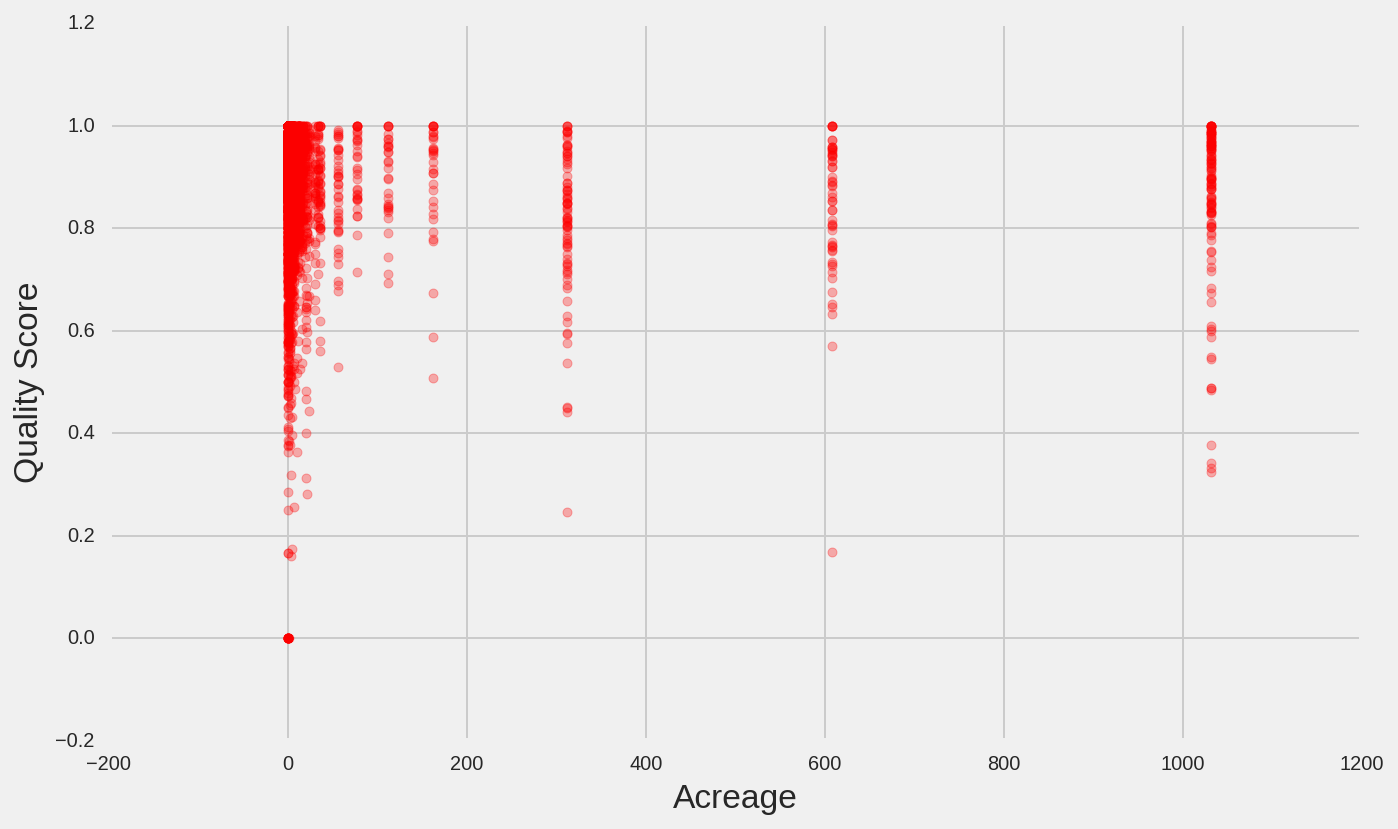

In [247]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax.scatter('Acreage','Score',data=parks,color='r',alpha=.3)
ax.set_xlabel('Acreage')
ax.set_ylabel('Quality Score')
plt.show()

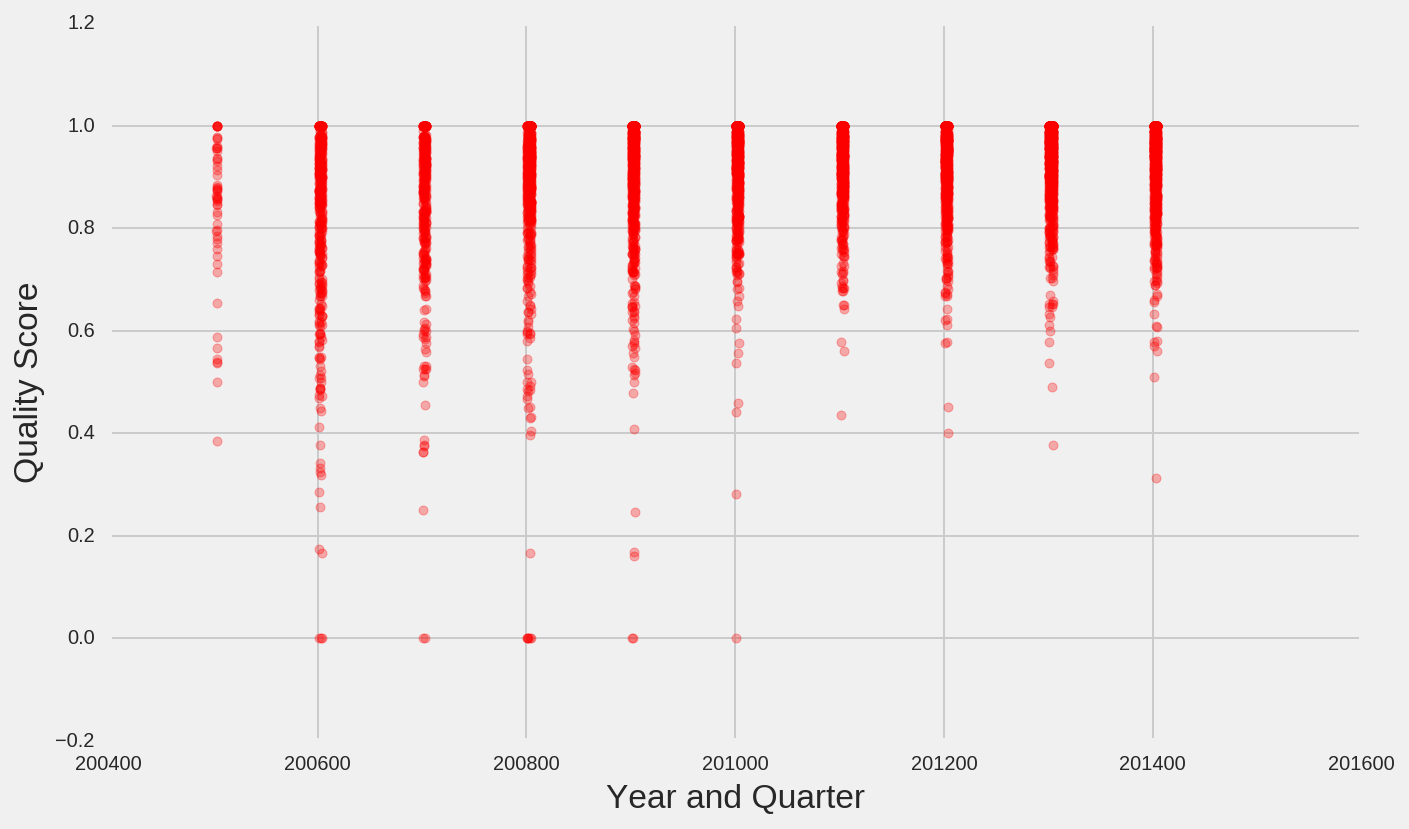

In [248]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax.scatter('FQ','Score',data=parks,color='r',alpha=.3)
ax.set_xlabel('Year and Quarter')
ax.set_ylabel('Quality Score')
plt.show()
# I need to subset to one date point as there are many duplicates since each park has a score for many dates

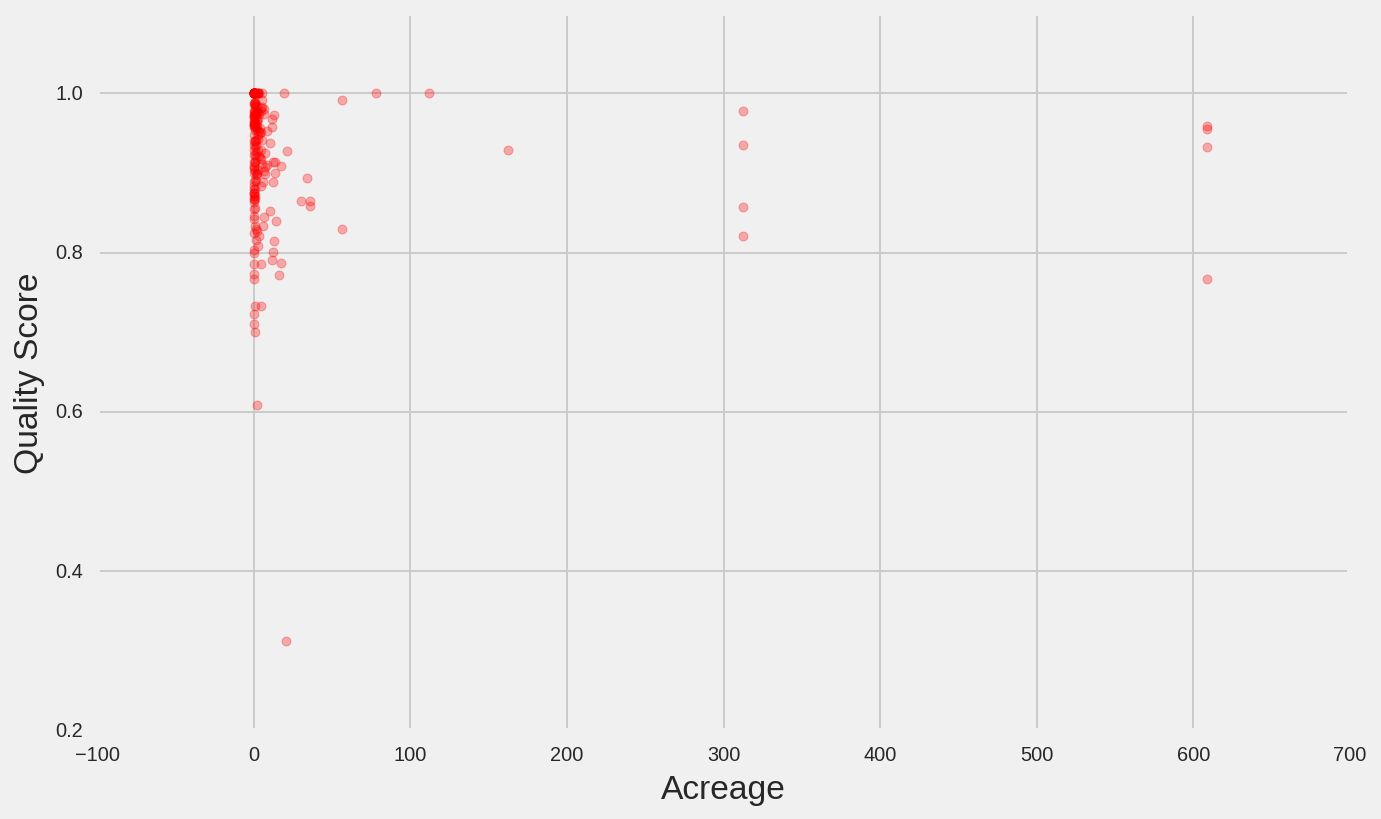

In [251]:
parks['FQ'].value_counts()
parks_sub = parks[parks['FQ']==201403]
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax.scatter('Acreage','Score',data=parks_sub,color='r',alpha=.3)
ax.set_xlabel('Acreage')
ax.set_ylabel('Quality Score')
plt.show()
#Removing the outliers may help

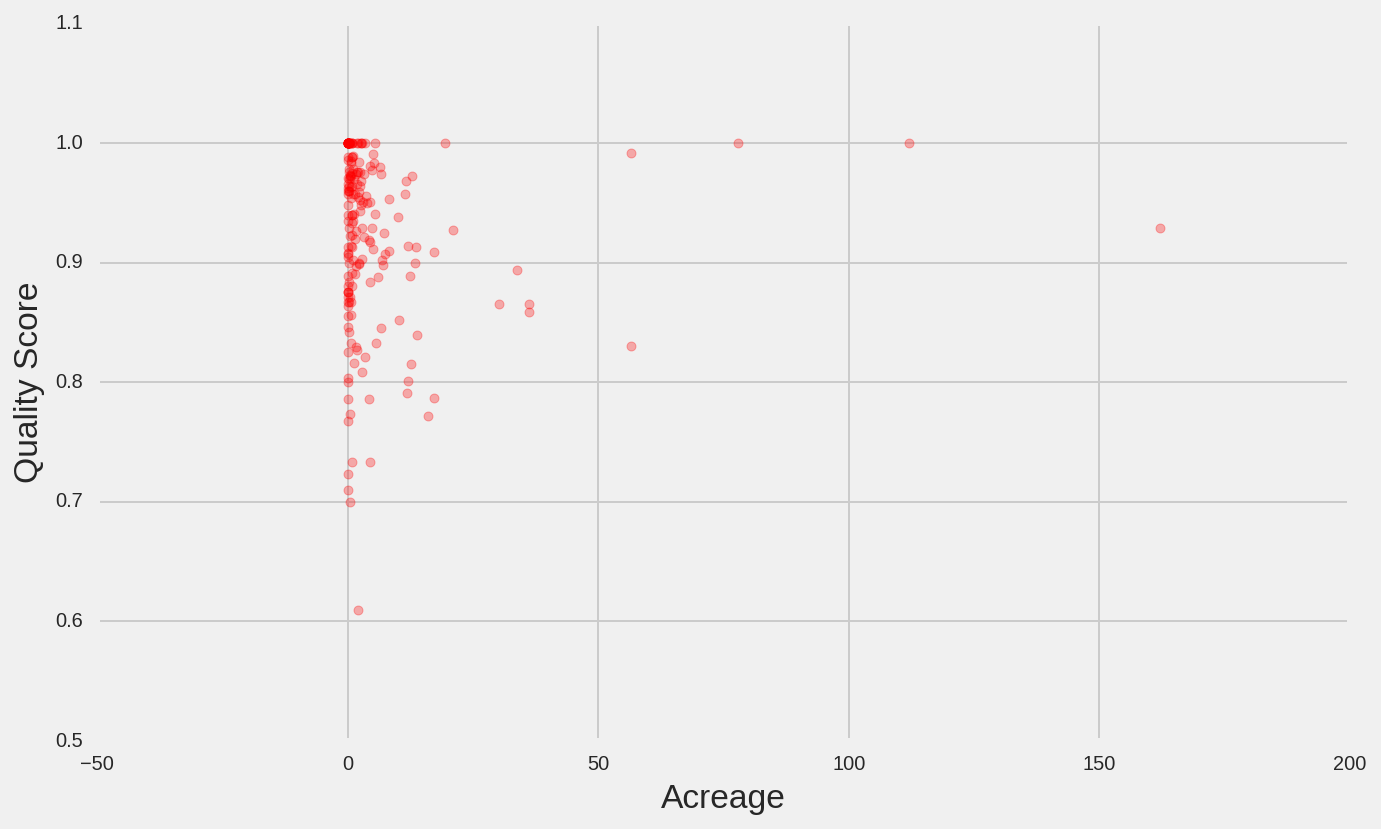

In [254]:
parks_sub = parks_sub[(parks_sub['Acreage']<300)&(parks_sub['Score']>.4)]
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax.scatter('Acreage','Score',data=parks_sub,color='r',alpha=.3)
ax.set_xlabel('Acreage')
ax.set_ylabel('Quality Score')
plt.show()

In [326]:
# I only have one predictor and target variable so will not do Lasso or Ridge since it is not necessary. I just want 
# to see if my hypothesis has something in it.
lr = LinearRegression()
y = parks_sub['Score'].values
x_train, x_test, y_train, y_test = train_test_split(parks_sub[['Acreage']].values, y, test_size=0.2)
print x_train.shape, y_train.shape
print x_test.shape, y_test.shape

model        =  lr.fit(x_train, y_train)
predictions  =  model.predict(x_test)
score        =  model.score(x_test, y_test)

print score

(154, 1) (154,)
(39, 1) (39,)
-0.0446664769654


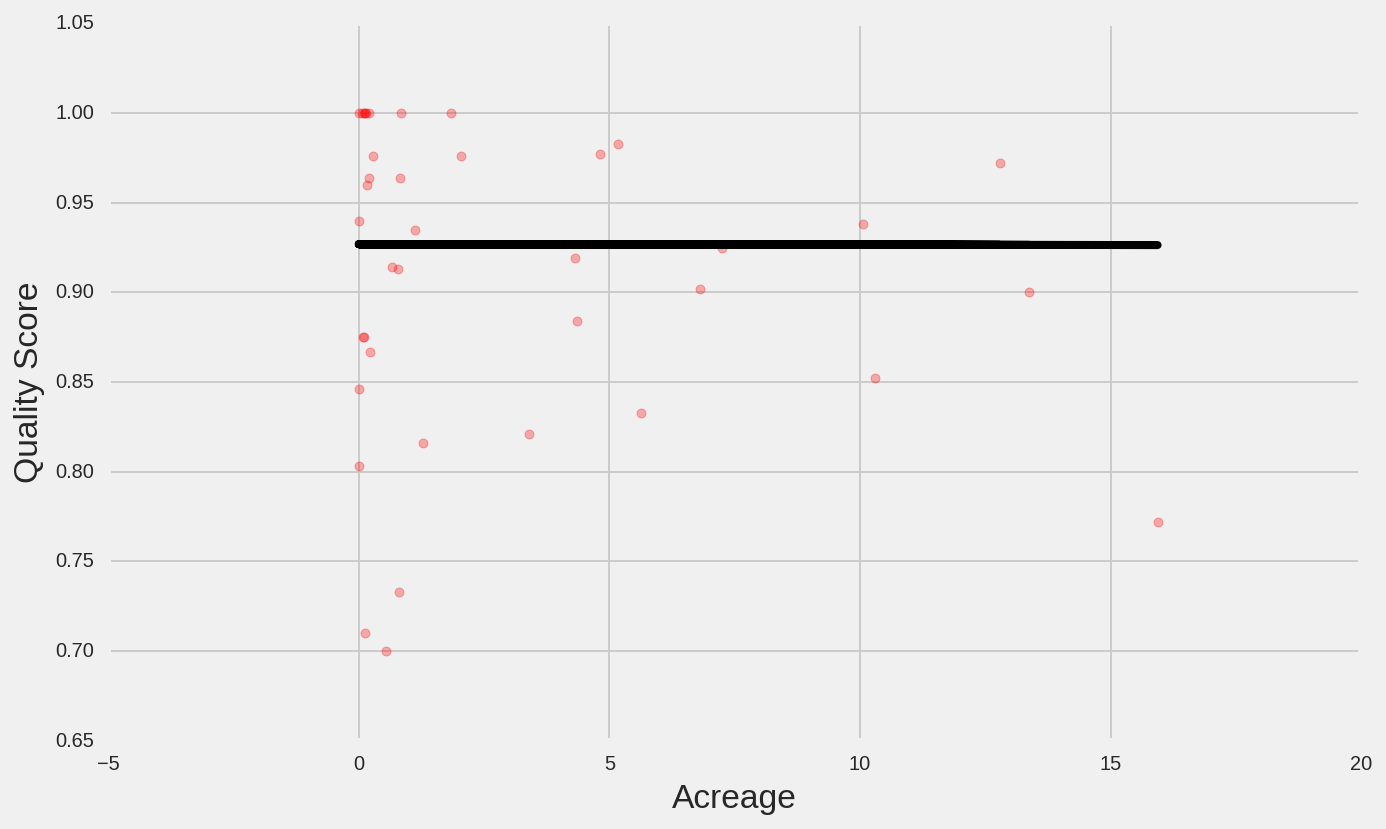

In [329]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax.scatter(x_test,y_test,color='r',alpha=.3)
ax.plot(x_test,predictions,color='black')
ax.set_xlabel('Acreage')
ax.set_ylabel('Quality Score')
plt.show()

Well, turns out I was completely wrong and Acreage really doesn't make any difference in calculating quality scores. In this case, bigger is definitely not always better.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.2 Ploting GridSearch with Lasso, Ridge, or Elasticnet
---
1. Using the gridsearch results, plot your score in relation to your parameters.
1. Plot the effect on your coefficients given alpha.
1. Plot any other parameter change to visualize the impact of any other hyperparameter.

It's helpful to understand the impact of parameters used in Gridsearch, and that you are comfortable working with the data that is generated for reporting to explore the results visually.

In [380]:
#Since my original 4 is a very limited regression I will use a different dataset(s) for this.
ass2007 = pd.read_csv('/home/llevin/Desktop/DSI-SF-2-llevin16/Projects/Project 4/san_francisco/assessor_office/assessor_data_2007_2008.csv')
ass2008 = pd.read_csv('/home/llevin/Desktop/DSI-SF-2-llevin16/Projects/Project 4/san_francisco/assessor_office/assessor_data_2008_2009.csv')
ass2009 = pd.read_csv('/home/llevin/Desktop/DSI-SF-2-llevin16/Projects/Project 4/san_francisco/assessor_office/assessor_data_2009_2010.csv')
ass2010 = pd.read_csv('/home/llevin/Desktop/DSI-SF-2-llevin16/Projects/Project 4/san_francisco/assessor_office/assessor_data_2010_2011.csv')
ass2011 = pd.read_csv('/home/llevin/Desktop/DSI-SF-2-llevin16/Projects/Project 4/san_francisco/assessor_office/assessor_data_2011_2012.csv')
ass2012 = pd.read_csv('/home/llevin/Desktop/DSI-SF-2-llevin16/Projects/Project 4/san_francisco/assessor_office/assessor_data_2012_2013.csv')
ass2013 = pd.read_csv('/home/llevin/Desktop/DSI-SF-2-llevin16/Projects/Project 4/san_francisco/assessor_office/assessor_data_2013_2014.csv')
ass2014 = pd.read_csv('/home/llevin/Desktop/DSI-SF-2-llevin16/Projects/Project 4/san_francisco/assessor_office/assessor_data_2014_2015.csv')
ass_key = pd.read_csv('/home/llevin/Desktop/DSI-SF-2-llevin16/Projects/Project 4/san_francisco/assessor_office/assessor_data_key.csv')

/home/llevin/anaconda2/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/llevin/anaconda2/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [385]:
ass_key

,DATA NAME,FIELD NAME,FIELD DESCRIPTION
0,PROPLOC,Property Location,"Situs/Location, as well as room/unit number"
1,RP1NBRCDE,Neighborhood Code,ASR neighborhood code based on MLS districts
2,RP1PRCLID,Block and Lot Number,Block and Lot Number (Full APN)
3,RP1VOLUME,Volume Number,Volume number
4,RP1CLACDE,Property Class Code,Property type
5,YRBLT,Year Property Built,Year improvement was built (can be blend of or...
6,BATHS,Number of Bathrooms,Number of bathrooms (BA with no shower or tub ...
7,BEDS,Number of Bedrooms,Number of bedrooms (bedrooms have a closet)
8,ROOMS,Number of Rooms,"Number of rooms, excluding bathrooms, halls, c..."
9,STOREYNO,Number of Stories,Number of stories


In [403]:
ass2007 = ass2007[['BATHS','BEDS','ROOMS','STOREYNO','UNITS','DEPTH','FRONT','SQFT','FBA','OWNRPRCNT','RP1PPTVAL']]
ass2008 = ass2008[['BATHS','BEDS','ROOMS','STOREYNO','UNITS','DEPTH','FRONT','SQFT','FBA','OWNRPRCNT','RP1PPTVAL']]
ass2009 = ass2009[['BATHS','BEDS','ROOMS','STOREYNO','UNITS','DEPTH','FRONT','SQFT','FBA','OWNRPRCNT','RP1PPTVAL']]
ass2010 = ass2010[['BATHS','BEDS','ROOMS','STOREYNO','UNITS','DEPTH','FRONT','SQFT','FBA','OWNRPRCNT','RP1PPTVAL']]
ass2011 = ass2011[['BATHS','BEDS','ROOMS','STOREYNO','UNITS','DEPTH','FRONT','SQFT','FBA','OWNRPRCNT','RP1PPTVAL']]
ass2012 = ass2012[['BATHS','BEDS','ROOMS','STOREYNO','UNITS','DEPTH','FRONT','SQFT','FBA','OWNRPRCNT','RP1PPTVAL']]
ass2013 = ass2013[['BATHS','BEDS','ROOMS','STOREYNO','UNITS','DEPTH','FRONT','SQFT','FBA','OWNRPRCNT','RP1PPTVAL']]
ass2014 = ass2014[['BATHS','BEDS','ROOMS','STOREYNO','UNITS','DEPTH','FRONT','SQFT','FBA','OWNRPRCNT','RP1PPTVAL']]

In [419]:
ass2007['Year']=2007
ass2008['Year']=2008
ass2009['Year']=2009
ass2010['Year']=2010
ass2011['Year']=2011
ass2012['Year']=2012
ass2013['Year']=2013
ass2014['Year']=2014

In [432]:
frames = [ass2007,ass2008,ass2009,ass2010,ass2011,ass2012,ass2013,ass2014]
asses = pd.concat(frames)
ass_mask = asses['RP1PPTVAL']>0
asses = asses[ass_mask]
asses.describe()

,BATHS,BEDS,ROOMS,STOREYNO,UNITS,DEPTH,FRONT,SQFT,FBA,OWNRPRCNT,RP1PPTVAL,Year
count,87388.000000,87388.000000,87388.000000,87388.000000,87388.000000,87388.000000,87388.000000,8.738800e+04,87388.000000,87388.000000,8.738800e+04,87388.000000
mean,9.905262,1.569586,28.421603,2.725889,9.820181,13.447154,0.082112,1.129584e+04,46.588353,0.843621,9.253601e+04,2010.528906
std,23.241481,10.776972,59.132785,4.019671,32.427462,25.792397,2.217822,4.566833e+04,490.066741,0.268978,1.900825e+06,2.283740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000e+00,2007.000000
25%,4.000000,0.000000,12.000000,2.000000,3.000000,0.000000,0.000000,3.139000e+03,0.000000,0.666660,3.700000e+02,2009.000000
50%,5.000000,0.000000,18.000000,2.000000,5.000000,0.000000,0.000000,4.578000e+03,0.000000,1.000000,7.500000e+02,2011.000000
75%,10.000000,0.000000,29.000000,3.000000,9.000000,20.000000,0.000000,8.332000e+03,0.000000,1.000000,2.172000e+03,2013.000000
max,850.000000,624.000000,3606.000000,565.000000,1910.000000,99.920000,99.390000,1.471929e+06,73878.000000,1.000000,1.540441e+08,2014.000000


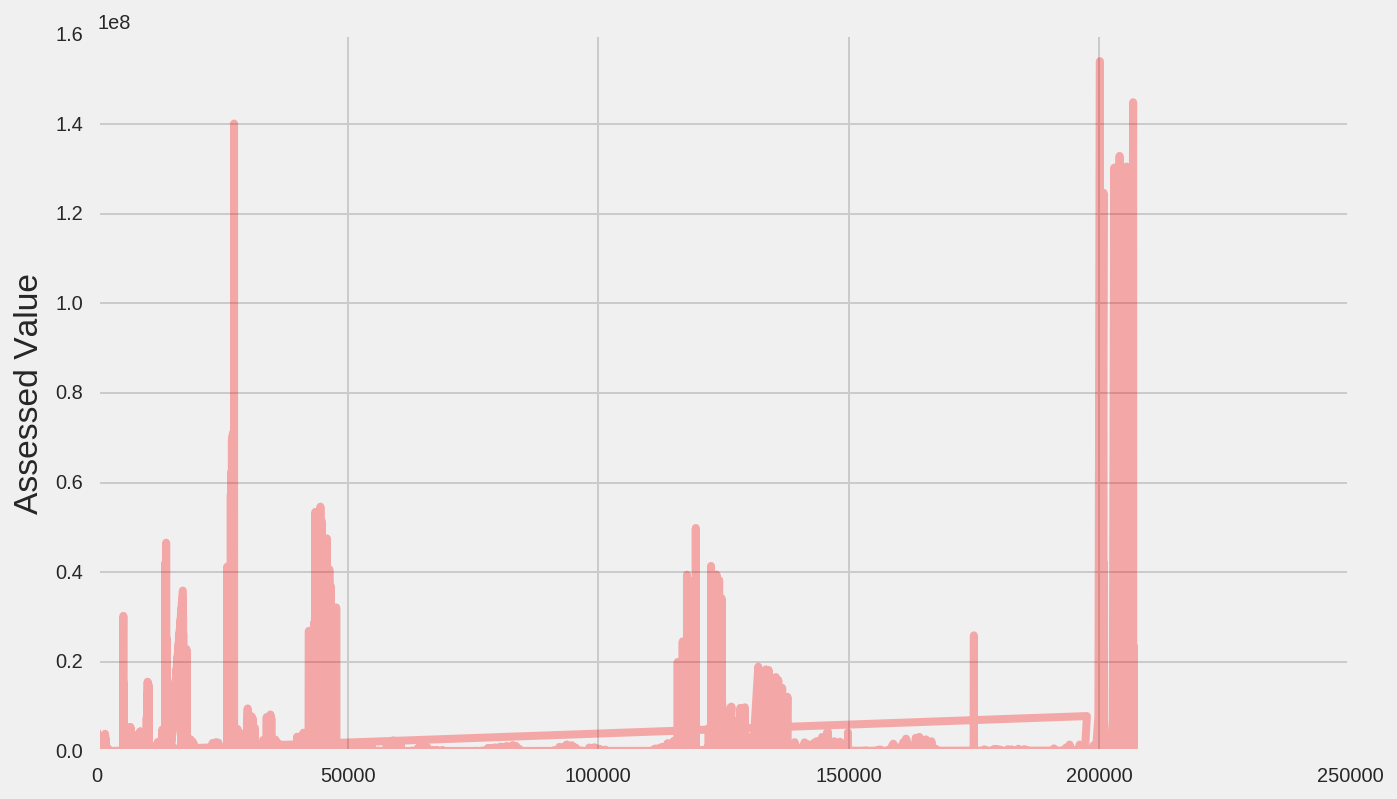

In [441]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax.plot(asses['RP1PPTVAL'],color='r',alpha=.3)
ax.set_ylabel('Assessed Value')
plt.show()

In [449]:
target = asses['RP1PPTVAL'].values
predictors = asses[['BATHS','BEDS','ROOMS','STOREYNO','UNITS','DEPTH','FRONT','SQFT','FBA','OWNRPRCNT','Year']].values

predictors_s = scaler.fit_transform(predictors)

In [451]:
# Setup our GridSearch Parameters
search_parameters = {
    'fit_intercept':  [True, False], 
    'normalize':      [False, True]
}

# Intialize a blank model object
lm = LinearRegression()

# Initialize gridsearch
estimator = grid_search.GridSearchCV(lm, search_parameters, cv=5)

# Fit some data!
best_ln = estimator.fit(predictors_s, target)

In [489]:
# Setup search parameters
search_parameters = {
    "alpha": np.arange(0, 0.15, 0.0025)
}

lasso = Lasso()

estimator = GridSearchCV(lasso, search_parameters, cv=5)
best_lasso = estimator.fit(predictors_s, target)

In [490]:
# Setup search parameters
search_parameters = {
    "alpha": np.logspace(0,5,100)
}

ridge = Ridge()

estimator = GridSearchCV(ridge, search_parameters,cv = 5)
best_ridge = estimator.fit(predictors_s, target)

In [491]:
print 'Linear Regression Score: ', best_ln.best_score_
print 'Lasso Regression Score: ', best_lasso.best_score_
print 'Ridge Regression Score ', best_ridge.best_score_

Linear Regression Score:  0.029050611151
Lasso Regression Score:  0.0290506277285
Ridge Regression Score  0.0293030024356


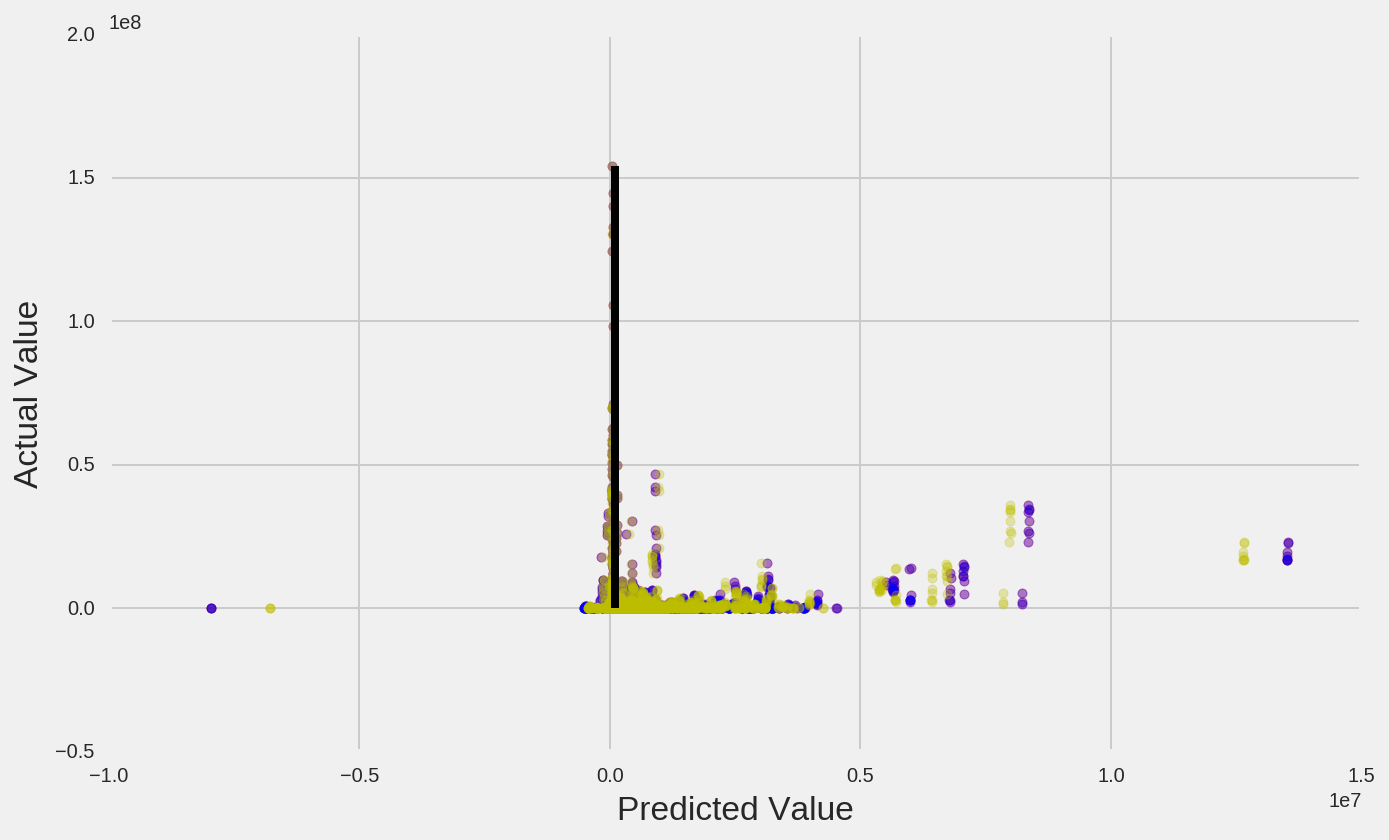

In [494]:
y_ln = best_ln.predict(predictors_s)
y_lasso = best_lasso.predict(predictors_s)
y_ridge = best_ridge.predict(predictors_s)

fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax.scatter(y_ln,target,color='r',alpha=.3)
ax.scatter(y_lasso,target,color='b',alpha=.3)
ax.scatter(y_ridge,target,color='y',alpha=.3)
ax.plot([np.mean(target),np.mean(target)],[np.min(target),np.max(target)],color='black')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Actual Value')
plt.show()

The graph above plots all predicted values from the three models against actual variables. It shows that not only are all the models pretty close to each other in terms of prediction power (check scores above), none of them are very good at predicting assessed value.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Select San Francisco data of your choice and construct a regularized regression model (this can be data from an earlier analysis if you like). Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.

For example, when I worked in neuroscience [we created an effective penalized regression dubbed "GraphNet"](http://arxiv.org/abs/1110.4139) that combined the Lasso and Ridge penalties like in Elastic net with a third penalty that rewarded clustering of coefficients according to physical distance in FMRI brain activation data.

**Devise of and implement a penalized regression for San Francisco data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?